<b>Support-Vector-Machine (SVM) - Scratch</b> <br>
<i>Implementing SVM using only NumPy, step-by-step. </i>

<b>requirements</b>

In [ ]:
# example:- pip install numpy

<b>imports</b>

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

<b>(1) DATA PRE-PROCESSING</b>

In [43]:
# Generate Synthetic Data
# Features (X) & Dependent-Variable(y)
X, y = datasets.make_blobs(
    n_samples = 200, n_features = 5, centers = 2, cluster_std = 3.5, random_state = 42)

# Data Pre-Processing - Data-Transformation 
# y is either +1 or -1 so, convert to float & making all 0s to -1 and +1 to +1
y = np.where(y == 0, -1.0, 1.0) 

# Data-Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Normalize (if needed)
# Data Visualization

<b>(2) ML ALGORITHM - SCRATCH</b>

In [44]:
class SVM: 
    
    # (2.1) Initialize Model-Parameters 
    def __init__(self, lr=0.001, C = 0.01, iters=10000) -> None:
        """
        Initializes the SVM-model's parameters and Hyper-parameters.
        
        Parameters: 
            weights : (np.array) weight-vector of model, Instance-Var so (value stays same for a specific instance)    
            bias    : (float) bias-term o the model, Instance-Var so (value stays same for a specific instance)              
            lr      : (float) Learning-Rate, [Hyper-Parameter]
            iters   : (int) Total number of Iterations for traininig the whole Dataset, [Hyper-Parameter]
            C       : (float) Regularization-Parameter, [Hyper-Parameter], C values in log scale like 0.001 to 1000
        
        Returns:     
            None
        """
        
        # Init Model-Params
        self.weights = None
        self.bias = None
         
        # Hyper-Parameters 
        self.lr = lr 
        self.C = C
        self.iters = iters
        
        
    # (2.2) Making-Predictions
    def predict(self, X) -> np.ndarray:
        """
        For given Features(x)[x1,x2..xn], predicts the output(ŷ)/y_pred is np array. 
        Applying Linear-Model : ŷ => w*x + b, if ŷ=(+) then class(+1) & if ŷ=(-) then class(-1)
        
        Parameters:
            X : (np.array) Independent-Variable (Features)
        
        Returns : 
            Signs of the elements of ŷ-array as an np.array
        """
                
        # ŷ = wx + b | ŷ[i] = x1[i]*w1[i] + x2[i]*w2[i] +...+ xn[i]*wn[i] + bias ; i = datapoints
        y_pred = np.dot(X, self.weights) + self.bias # dot-prod need no for-loop
        
        # returns np-array of signs(+ or -) of elements in y_pred array
        return np.sign(y_pred) 
    
    
    # (2.3) Cost-Function
    def hinge_loss(self, X, y) -> np.ndarray:
        """
        Loss : Hinge-Loss, L(w,b) = ξi = max(0, [ 1 - yi(w.xi - b)]) ; for i-th Datapoint
        Calcs the error-score/loss for each i-th example, stores all losses as np.array(losses)
        
        Cost : J(w,b) = {(1/2)*||w||^2 + C*sum(ξi)} ; i= 1 to n, i.e for all datapoints
        Calculates overall cost of 1-iter by adding all-losses[sum(ξi)] and margin_cost||w||
        
        Parameters:
            X : (np.array) Independent-Variable (Features)
            y : (np.array) Dependent-variables 
        
        Returns: 
            t, loss, cost as three separate np.arrays
            t, loss needed for hinge-loss-curve
            cost needed to analyse cost values over interations
        """
        
        # Loss-Function using VECTORIZATION (faster) 
        # ti = yi*(w.xi + b) | t = t1 + t2 +..+ tn ; i = datapoints (1 to n) | w1[i]*x1[i]+ ..
        t = y * np.dot(X, self.weights) + self.bias 
       
        # L(w,b)i = max[0, 1-ti] | loss = loss1 + loss2 + ... + lossn ; i = datapoints (1 to n )
        losses = np.maximum(0, 1 - t) 
        
        # Loss-Function using for-loop (slower)
        """
        Loss-Function Previously Done using for-loop :-
        
        for i in range(n_rows):
            # t = yi*(w.xi + b)
            t[i] = y[i] * np.dot(self.weights, X[i]) + self.bias
            
            # L(w,b) = max[0, 1-t]
            loss[i] = max(0, 1 - t[i])
        
        but np vectorization much faster
        """
        
        
        # Cost-Function
        # Margin Cost : (1/2)*||w||^2 , dot-prod gives the square & magnitude of weights-vector 
        w_square = (1/2)*(np.dot(self.weights,self.weights))
        
        # Cost : J(w,b) = {(1/2)*||w||^2 + C*sum(ξi)}
        cost = w_square + self.C * np.sum(losses) 

        # returns t, losses, cost as np.arrays
        return t, losses, cost
    
    
    # (2.4) Fit Model to Data (Learning-&-Training)  
    def fit(self, X, y):
        """
        Initializes Model-Params weights-&-bias to zeros or random-values
        Trains The full model, repeat: 
            Calculate Gradients, updates weights-&-bias, calculates loss 
        
        Converts the y_ vlaues to either -1 or +1
        Learns the model-Params (w & b) using GD algo and Trains the model with iters
        
        Parameters:
            X : (np.array) Independent-Variable (Features)
            y : (np.array) Dependent-Variable
        
        Retruns:
            self.weights, self.bias, t, loss  as np.array
            cost_history as list
        """
        
        # n_data = number-of-Data(rows), n_features = number-of-features(cols)
        n_data, n_features = X.shape
        
        # Initialize Model-Parameters with zeros or random numbers
        self.weights = np.random.random(n_features)
        self.bias = np.random.random()

        # Empty-list Stores all Costs
        cost_history = []

        # Training Model  
        for itr in range(self.iters):
            
            ########## CALCULATE GRADIENT / DERIVATIVE ##########          
            # Reset Gradients / derivatives before each training-iter 
            dj_dw = np.zeros(n_features)
            dj_db = 0
            
            # # Iterating each datapoint (xi)  using for-loop (slower)               
            """for i in range(n_data):
                
                # Hinge-Condition               
                hinge_cond = (1 - y[i] * (np.dot(self.weights,X[i]) + self.bias)) > 0 
                
                if hinge_cond: # true means there is Loss
                    dj_dw -= self.C * y[i] * X[i] # slope = slope-misclassified  
                    dj_db -= self.C * y[i]
                    
            # Add Regularization-Gradient, when L(w,b)=0 only wj, else  wj-C*yi*xi 
            dj_dw += self.weights """
            
            # Iterating each datapoint (xi) using np VECTORIZATION (super faster)
            # Predict output for all datapoints at once using vectorized operations
            margin = y * (np.dot(X, self.weights) + self.bias)

            # Hinge loss condition vectorized: where margin < 1 (i.e., hinge_cond is True)
            misclassified = np.where(margin < 1, 1, 0)

            # Vectorized calculation of gradient
            # dj_dw is the sum of gradients for all misclassified points
            dj_dw = self.weights - self.C * np.dot((misclassified * y), X)
            dj_db = -self.C * np.sum(misclassified * y)
               
            ##################################################### 


            # Graient-Descent Algorithm (Updating weights & bias)
            self.weights -= self.lr * dj_dw # newly Learned weights
            self.bias -= self.lr * dj_db # newly Learned bias
            
            # Calculating cost with updated self.weights & self.bias
            # no need to send self.weights & self.bias as arguments as instance-vars
            t,loss,cost = self.hinge_loss(X,y)    
            
            # Appends Cost of each iteration in the list Cost_history
            cost_history.append(cost)
            
            # Prints details after each 100th iter
            if itr % 100 == 0:
                print(f"iter={itr} weight={self.weights} bias={self.bias} cost={cost}")               
        
        # Returns newly-learned weights-&-bias, cost_history, t, loss             
        return self.weights, self.bias, cost_history, t, loss  

<b>(3) MODEL TRAINING</b>

In [45]:
# Creating SVM Instance
svm_Classifier = SVM(lr=0.001, C=0.01, iters=1000)

import time
start = time.time()
# Fit (Training) The SVM model with the Training-Datasets
w_new, b_new, cost_history, t, losses = svm_Classifier.fit(X_train, y_train)

end = time.time()

print(f"time elapsed : {(end-start)*1000} ms")
# Predicting on Test-Set using the trained SVM model (by the learned 'weights & bias')

iter=0 weight=[0.31024552 0.33878824 0.68655568 0.8236285  0.01613402] bias=0.6626607893678107 cost=7.638523548906269
iter=100 weight=[ 0.27446896 -0.25630513  0.39237648  0.53424195  0.41613492] bias=0.6172107893678094 cost=0.68785426589651
iter=200 weight=[ 0.23359265 -0.36807902  0.28291423  0.38540307  0.45228688] bias=0.6038207893678089 cost=0.3432584830370696
iter=300 weight=[ 0.1944296  -0.38565507  0.22497057  0.30801527  0.43514912] bias=0.5987307893678098 cost=0.2686803666551859
iter=400 weight=[ 0.16727237 -0.37116286  0.18729628  0.25763623  0.41010297] bias=0.5956907893678106 cost=0.22101620793396556
iter=500 weight=[ 0.14591913 -0.34467192  0.15641932  0.22096457  0.38482678] bias=0.5936907893678086 cost=0.18258315526990393
iter=600 weight=[ 0.1265989  -0.32070312  0.1284821   0.18778434  0.36195709] bias=0.5916907893678066 cost=0.15178058663443897
iter=700 weight=[ 0.10776526 -0.29954936  0.10518708  0.15753493  0.34106779] bias=0.5899907893678066 cost=0.1271445217498301

<b>(4) PREDICTION</b>

In [46]:
y_preds = svm_Classifier.predict(X_test)

<b>(5) EVALUATION-VISUALIZATION</b>

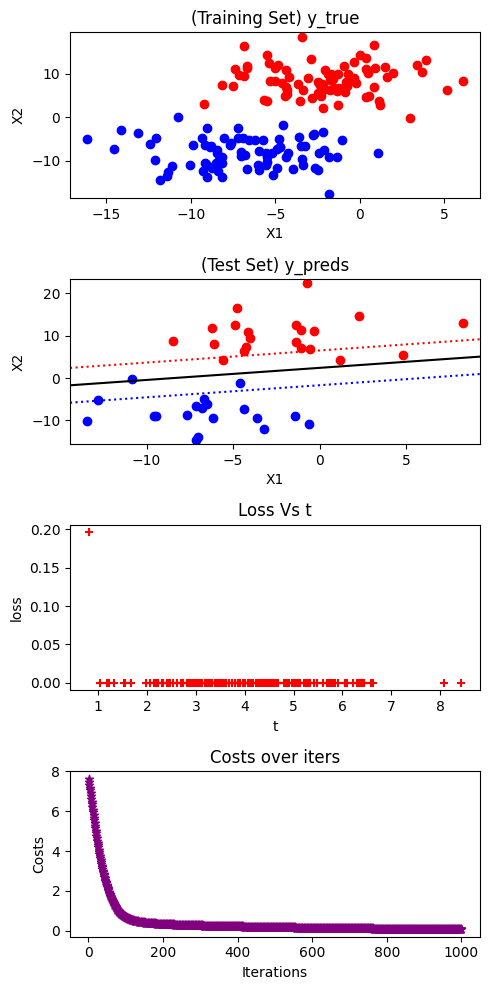

In [47]:
# Visualization 
def plot_true_vs_preds(X, y, w, b, t, losses):
    
    fig, ax = plt.subplots(4, 1, figsize=(5, 10))

    # limit plot display horizontally and vertically
    xlim = np.array([X[:,0].min()-1, X[:,0].max()+1])
    ylim = np.array([X[:,1].min()-1, X[:,1].max()+1])

    # PLOT-01 : y_true plot
    ax[0].scatter(X[:,0][y==-1], X[:,1][y==-1], c='r', label='y=-1')
    ax[0].scatter(X[:,0][y==1], X[:,1][y==1], c='b', label='y=1')
    ax[0].set_title("(Training Set) y_true")
    ax[0].set_xlabel("X1")
    ax[0].set_ylabel("X2")
    ax[0].set_xlim(xlim[0], xlim[1])
    ax[0].set_ylim(ylim[0], ylim[1])
    
    # limit plot display horizontally and vertically
    xlim = np.array([X_test[:,0].min()-1, X_test[:,0].max()+1])
    ylim = np.array([X_test[:,1].min()-1, X_test[:,1].max()+1])
    
    # PLOT-02 : y_preds plot
    # y_preds = svm_Classifier.predict(X_test)
    ax[1].scatter(X_test[:,0][y_preds==-1], X_test[:,1][y_preds==-1], c='red', label='y=-1')
    ax[1].scatter(X_test[:,0][y_preds==1], X_test[:,1][y_preds==1], c='blue', label='y=1')
    ax[1].set_title("(Test Set) y_preds")
    ax[1].set_xlabel("X1")
    ax[1].set_ylabel("X2")
    ax[1].set_xlim(xlim[0], xlim[1])
    ax[1].set_ylim(ylim[0], ylim[1])

    # DB & margin // WHAT IF MORE THAN TWO FEATUES more than two weights? w[3],w[4]?
    xx = xlim
    yyn = (-1 - b - (w[0] * xx)) / w[1]
    yym =     (-b - (w[0] * xx)) / w[1]
    yyp =  (1 - b - (w[0] * xx)) / w[1]
    
    # Plots above 3 lines
    ax[1].plot(xx, yyn, color='red', linestyle='dotted') # wx + b = -1
    ax[1].plot(xx, yym, color='black') # Decision Bounary
    ax[1].plot(xx, yyp, color='blue', linestyle='dotted') # wx + b = 1

    # PLOT-03: Loss-Curve Loss Vs t
    ax[2].scatter(t, losses, color = 'red', marker = '+')
    ax[2].set_title("Loss Vs t")
    ax[2].set_xlabel("t")
    ax[2].set_ylabel("loss")    

    # PLOT-04: Cost Vs Iter plot
    iters = list(range(1,svm_Classifier.iters + 1))
    ax[3].scatter(iters, cost_history, color = 'purple', marker = '*')
    ax[3].set_title("Costs over iters")
    ax[3].set_xlabel("Iterations")
    ax[3].set_ylabel("Costs")
        

    plt.tight_layout()
    plt.show()

#plot_true_vs_preds(X,y,weights,bias)
plot_true_vs_preds(X_train, y_train, w_new, b_new, t, losses)

<b>CONCLUSION</b>
- The model performs well in higher dimentions